## Làm sạch dữ liệu (Xử lý giá trị thiếu, ngoại lai).

In [45]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn

In [46]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("sample/bds_hn_data.csv")
df

,page,published_date,price,area,price_per_m2,bedroom,wc,location,home_type,legal_status,furniture
0,1,07/10/2025,4.72,75.0,63.00,3.0,2.0,"Gia Lâm, Hà Nội",căn hộ chung cư,Sổ đỏ/ Sổ hồng,Đầy đủ
1,1,07/10/2025,4.28,72.0,59.50,NaN,NaN,"Đông Anh, Hà Nội",đất,NaN,NaN
2,1,07/10/2025,38.30,288.0,133.00,NaN,NaN,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",NaN,NaN
3,1,07/10/2025,2.75,43.0,63.95,1.0,NaN,"Gia Lâm, Hà Nội",căn hộ chung cư,Sổ đỏ/ Sổ hồng,NaN
4,1,07/10/2025,3.85,18.0,213.89,2.0,1.0,"Đống Đa, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3971,199,07/10/2025,3.45,35.0,98.57,NaN,NaN,"Đống Đa, Hà Nội",condotel,NaN,Đầy đủ
3972,199,07/10/2025,9.18,153.0,60.00,NaN,NaN,"Quốc Oai, Hà Nội",đất,Sổ đỏ/ Sổ hồng,NaN
3973,199,07/10/2025,2.31,62.5,37.00,2.0,2.0,"Thạch Thất, Hà Nội",căn hộ chung cư,Sổ đỏ/ Sổ hồng,Đầy đủ
3974,199,07/10/2025,6.00,30.0,200.00,NaN,NaN,"Hai Bà Trưng, Hà Nội",nhà riêng,Sổ đỏ/ Sổ hồng,NaN


In [48]:
# Tỷ lệ khuyết thiếu của các trường dữ liệu
df.select_dtypes("float")
df.isna().sum()/df.shape[0]

page              0.000000
published_date    0.000000
price             0.128773
area              0.000000
price_per_m2      0.135815
bedroom           0.364940
wc                0.404930
location          0.000000
home_type         0.000000
legal_status      0.114940
furniture         0.444920
dtype: float64

In [49]:
#Tìm các cột dữ liệu dạng số có chứa missing data
numeric_cols = df.select_dtypes("float", "int64").columns.tolist()

df[numeric_cols].isna().sum()/len(df)

#Điền các gía trị khuyết thiếu bằng median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[numeric_cols].isna().sum()/len(df)

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/408445497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/408445497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

price           0.0
area            0.0
price_per_m2    0.0
bedroom         0.0
wc              0.0
dtype: float64

In [50]:
#Tìm các cột dữ liệu dạng categorical có chứa missing data
categorical_cols = df.select_dtypes("object").columns.tolist()

nan_cols = df[categorical_cols].loc[:, df[categorical_cols].isna().any()].columns.tolist()

##Nhóm các giá trị missing lại và điền tên nhóm mới
for col in nan_cols:
    #mode = df[col].mode()
    df[col].fillna("Không có - Thiếu", inplace=True)

df[categorical_cols].isna().sum()/len(df)

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/1282465314.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Không có - Thiếu", inplace=True)


published_date    0.0
location          0.0
home_type         0.0
legal_status      0.0
furniture         0.0
dtype: float64

<Axes: >

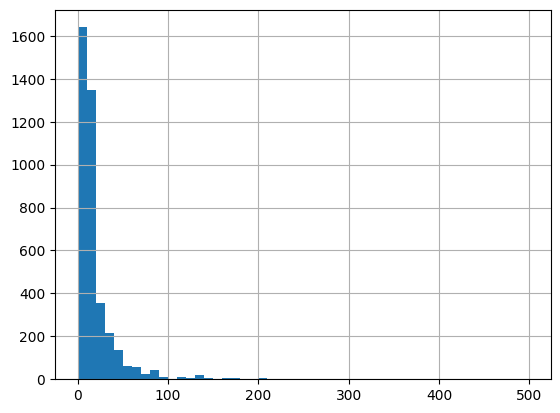

In [51]:
df['price'].hist(bins=50)

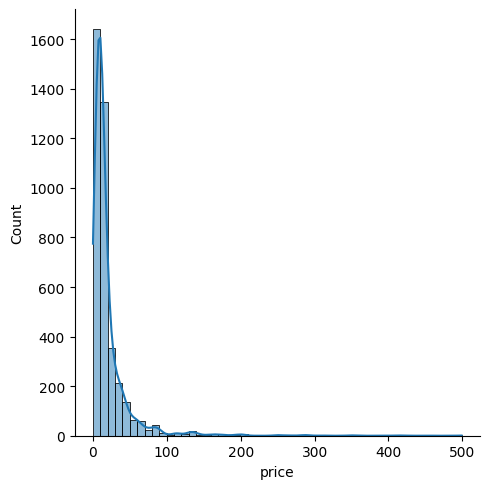

In [52]:
sns.displot(df['price'], bins=50, kde=True)


In [53]:
df.shape

(3976, 11)

In [54]:
# Lọc các dữ liệu price ngoại lai bằng z-score
sub_df = df[["published_date", "location", "home_type", "price", "area", "bedroom", "wc", "legal_status", "furniture"]]
sub_df["z_score_price"] = stats.zscore(df["price"])
sub_df = sub_df[(abs(sub_df["z_score_price"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/2354493381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_price"] = stats.zscore(df["price"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.484877
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.499159
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.605087
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.548821
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.513116
...,...,...,...,...,...,...,...,...,...,...
3971,07/10/2025,"Đống Đa, Hà Nội",condotel,3.45,35.0,3.0,3.0,Không có - Thiếu,Đầy đủ,-0.526100
3972,07/10/2025,"Quốc Oai, Hà Nội",đất,9.18,153.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.340111
3973,07/10/2025,"Thạch Thất, Hà Nội",căn hộ chung cư,2.31,62.5,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.563103
3974,07/10/2025,"Hai Bà Trưng, Hà Nội",nhà riêng,6.00,30.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.443330


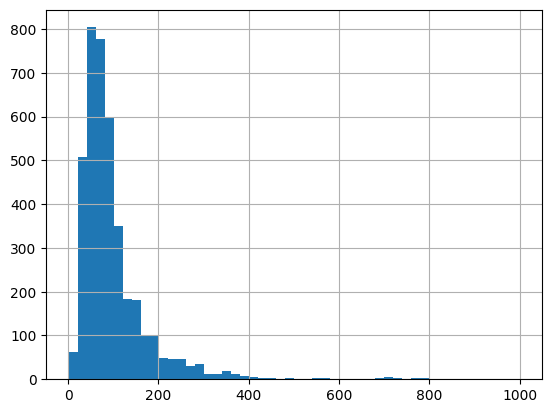

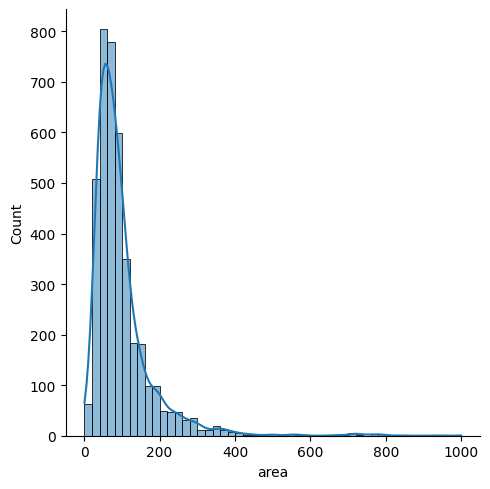

In [55]:
df["area"].hist(bins=50)
sns.displot(df['area'], bins=50, kde=True)

In [56]:
# Lọc các dữ liệu ngoại lai area bằng z-score
sub_df["z_score_area"] = stats.zscore(sub_df["area"])
sub_df = sub_df[(abs(sub_df["z_score_area"]) <= 3)]
sub_df

,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.484877,-0.260079
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.499159,-0.296864
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.605087,2.351643
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.548821,-0.652451
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.513116,-0.958991
...,...,...,...,...,...,...,...,...,...,...,...
3971,07/10/2025,"Đống Đa, Hà Nội",condotel,3.45,35.0,3.0,3.0,Không có - Thiếu,Đầy đủ,-0.526100,-0.750544
3972,07/10/2025,"Quốc Oai, Hà Nội",đất,9.18,153.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.340111,0.696326
3973,07/10/2025,"Thạch Thất, Hà Nội",căn hộ chung cư,2.31,62.5,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.563103,-0.413349
3974,07/10/2025,"Hai Bà Trưng, Hà Nội",nhà riêng,6.00,30.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.443330,-0.811852


In [57]:
# Lọc các dữ liệu ngoại lai wc bằng z-score
sub_df["z_score_wc"] = stats.zscore(sub_df["wc"])
sub_df = sub_df[(abs(sub_df["z_score_wc"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/2644475254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_wc"] = stats.zscore(sub_df["wc"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area,z_score_wc
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.484877,-0.260079,-0.461385
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.499159,-0.296864,-0.180178
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.605087,2.351643,-0.180178
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.548821,-0.652451,-0.180178
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.513116,-0.958991,-0.742592
...,...,...,...,...,...,...,...,...,...,...,...,...
3971,07/10/2025,"Đống Đa, Hà Nội",condotel,3.45,35.0,3.0,3.0,Không có - Thiếu,Đầy đủ,-0.526100,-0.750544,-0.180178
3972,07/10/2025,"Quốc Oai, Hà Nội",đất,9.18,153.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.340111,0.696326,-0.180178
3973,07/10/2025,"Thạch Thất, Hà Nội",căn hộ chung cư,2.31,62.5,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.563103,-0.413349,-0.461385
3974,07/10/2025,"Hai Bà Trưng, Hà Nội",nhà riêng,6.00,30.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.443330,-0.811852,-0.180178


In [58]:
# Lọc các dữ liệu ngoại lai bedroom bằng z-score
sub_df["z_score_bedroom"] = stats.zscore(sub_df["bedroom"])
sub_df = sub_df[(abs(sub_df["z_score_bedroom"]) <= 3)]
sub_df

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/2568147042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_bedroom"] = stats.zscore(sub_df["bedroom"])


,published_date,location,home_type,price,area,bedroom,wc,legal_status,furniture,z_score_price,z_score_area,z_score_wc,z_score_bedroom
0,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,4.72,75.0,3.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.484877,-0.260079,-0.461385,-0.255517
1,07/10/2025,"Đông Anh, Hà Nội",đất,4.28,72.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,-0.499159,-0.296864,-0.180178,-0.255517
2,07/10/2025,"Đan Phượng, Hà Nội","nhà biệt thự, liền kề",38.30,288.0,3.0,3.0,Không có - Thiếu,Không có - Thiếu,0.605087,2.351643,-0.180178,-0.255517
3,07/10/2025,"Gia Lâm, Hà Nội",căn hộ chung cư,2.75,43.0,1.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.548821,-0.652451,-0.180178,-1.264165
4,07/10/2025,"Đống Đa, Hà Nội",nhà riêng,3.85,18.0,2.0,1.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.513116,-0.958991,-0.742592,-0.759841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,07/10/2025,"Đống Đa, Hà Nội",condotel,3.45,35.0,3.0,3.0,Không có - Thiếu,Đầy đủ,-0.526100,-0.750544,-0.180178,-0.255517
3972,07/10/2025,"Quốc Oai, Hà Nội",đất,9.18,153.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.340111,0.696326,-0.180178,-0.255517
3973,07/10/2025,"Thạch Thất, Hà Nội",căn hộ chung cư,2.31,62.5,2.0,2.0,Sổ đỏ/ Sổ hồng,Đầy đủ,-0.563103,-0.413349,-0.461385,-0.759841
3974,07/10/2025,"Hai Bà Trưng, Hà Nội",nhà riêng,6.00,30.0,3.0,3.0,Sổ đỏ/ Sổ hồng,Không có - Thiếu,-0.443330,-0.811852,-0.180178,-0.255517


In [59]:
sub_df["furniture"].value_counts()

furniture
Không có - Thiếu                1644
Đầy đủ                          1211
Cơ bản                           395
Không nội thất                   104
Đầy đủ.                           63
                                ... 
Đầy đủ nội thất cơ bản.            1
Nội thất hoàn thiện cao cấp.       1
Full nội thất 5*                   1
Full nội thất cao cấp              1
Đầy đủ nội thất xịn.               1
Name: count, Length: 165, dtype: int64

In [ ]:
s = sub_df["furniture"].astype(str).str.lower()

conds = [
    s.str.contains(r'\bcó\b|full', regex=True),
    s.str.contains(r'\b(không|ko|k0)\b', regex=True) | s.str.contains(r'(^|[^a-zA-ZÀ-ỹ])k([^a-zA-ZÀ-ỹ]|$)', regex=True),
    s.str.contains(r'cao cấp|luxury', regex=True),
    s.str.contains(r'đồ\s*cơ\s*bản|cơ\s*bản', regex=True),
]
choices = ["Đầy đủ", "Không có - Thiếu", "Cao cấp", "Cơ bản"]

sub_df["furniture"] = np.select(conds, choices, default="Cơ bản")
sub_df["furniture"].value_counts()

/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/1769015434.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s.str.contains(r'\b(không|ko|k0)\b', regex=True) | s.str.contains(r'(^|[^a-zA-ZÀ-ỹ])k([^a-zA-ZÀ-ỹ]|$)', regex=True),
/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/1769015434.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["furniture"] = np.select(conds, choices, default="Cơ bản")


furniture
Không có - Thiếu    1759
Đầy đủ              1416
Cơ bản               510
Cao cấp               24
Name: count, dtype: int64

In [62]:
sub_df["legal_status"].value_counts()

legal_status
Sổ đỏ/ Sổ hồng                                             2700
Không có - Thiếu                                            429
Hợp đồng mua bán                                            269
Sổ đỏ/ Sổ hồng.                                             142
Sổ đỏ                                                        66
Đang chờ sổ                                                  21
Sổ đỏ.                                                       15
Hợp đồng mua bán.                                             5
Sổ đỏ chính chủ                                               5
Có sổ đỏ                                                      4
Đang chờ sổ.                                                  4
THANH XUÂN!                                                   3
Sổ đỏ chính chủ.                                              3
Có sổ                                                         3
Sổ hồng                                                       3
Sổ đỏ/ sổ hồng             

In [ ]:
s = sub_df["legal_status"].astype(str).str.lower()

conds = [
    s.str.contains(r'\bđầy đủ\b|full', regex=True),
    s.str.contains(r'\b(không|ko|k0)\b', regex=True) | s.str.contains(r'(^|[^a-zA-ZÀ-ỹ])k([^a-zA-ZÀ-ỹ]|$)', regex=True),
    s.str.contains(r'cao cấp|luxury', regex=True),
    s.str.contains(r'đồ\s*cơ\s*bản|cơ\s*bản', regex=True),
]
choices = ["Đầy đủ", "Không có - Thiếu", "Cao cấp", "Cơ bản"]

sub_df["furniture"] = np.select(conds, choices, default="Cơ bản")
sub_df["furniture"].value_counts()

In [61]:
sub_df.drop(columns=["z_score_price", "z_score_area", "z_score_wc", "z_score_bedroom"],
            inplace=True)

sub_df.to_csv("sample/bds_hn_data_cleaned.csv", index=False)


/var/folders/wg/c6bdg_094yn3nxtc6l2zfrdc0000gn/T/ipykernel_6788/704840360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["z_score_price", "z_score_area", "z_score_wc", "z_score_bedroom"],
